# Modelling Zi
## Objectives

### Model Alternatives


### Imports

In [1]:
%matplotlib inline
import site
site.addsitedir('/home/b3053674/Documents/pycotools')
from pycotools.Tests import test_models
from pycotools import model, tasks, viz, misc
import os
from lxml import etree

root:INFO:27:    Initializing pycotools
root:INFO:28:    Initializing logging System
root:INFO:29:    logging config file at: /home/b3053674/Documents/pycotools/pycotools/logging_config.conf


## Get the original Zi Model

In [2]:
## get string model from test_models
zi_model_string = test_models.TestModels().zi_model()

## get a working directory. Change this to change this to wherever you like
directory = r'/home/b3053674/Documents/pycotools/pycotools/Examples'

## choose path to zi model
zi_path = os.path.join(directory, 'zi2012.cps')

##write model to file
with open(zi_path, 'w') as f:
    f.write(zi_model_string)
    
## check file exists
if not os.path.isfile(zi_path):
    raise Exception

## Get Modified Zi Models
9 Model varients have been prebuilt using the copasi GUI. The models were opened with a text editor and the xml strings were copied and pasted into a python class called `Models` in the `zi_model_varients` module. The `Model` class has a single property for each model which just returns the model string. This system of handling many copasi models has the advantage of being highly organized and minimizes mistakes by human error. 

### A function to get models as strings

In [20]:
import zi_model_varients 
def get_models(directory):
    """
    Get models from Models class and save as cps
    files in a directory of users choosing. 
    
    :param directory: where to save the model varients
    :return: dict[model_id] = FullPathToModel
    """
    ## if directory not exists create it
    if not os.path.isdir(directory):
        os.makedirs(directory)
    
    ## get all methods of the Models class
    all_methods = dir(zi_model_varients.Models)
    
    ## remove magic methods
    all_model_methods = [i for i in all_methods if i[:2]!='__']
    all_model_methods = [i for i in all_methods if i != 'published_zi']
    
    M = Models()
    dct = {}
    for model_id in all_model_methods:
        m = getattr(Models, model_id)
        if type(m) == property:
            model_str = m.fget(M)
            cps_file = os.path.join(directory, '{}.cps'.format(model_id))
            dct[model_id] = cps_file

            ## if already exists remove
            if os.path.isfile(cps_file):
                os.remove(cps_file)

            ## write file
            with open(cps_file, 'w') as f:
                f.write(model_str)

            ## raise error if not exists
            if not os.path.isfile(cps_file):
                raise Exception

    return dct

    ## new directory for fitting
fit_dir = os.path.join(directory, 'Fit1Dir')

model_paths = get_models(fit_dir)

## Read models into pycotools

In [21]:
def read_models_into_pycotools(files_dct):
    dct = {}
    for v in files_dct.values():
        dct[v] = model.Model(v)
    return dct

models = read_models_into_pycotools(model_paths)
for k, v in models.items():
    print (v)

Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)
Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)
Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)


# Experimental Data
## Parse into pandas

In [22]:
import pandas

def read_data_file(fle):
    """
    read data into pandas dataframe for each 
    data set
    """
    data = pandas.read_csv(fle)
    data = data.set_index(['Cell Type', 'Repeat'])
    time = [int(i)*60 for i in data.columns]
    data.columns = time
    return data
    
smad7_mRNA_data_file = os.path.join(directory, 'smad7_pcr_data.csv')
ski_data_file = os.path.join(directory, 'ski_pcr_data.csv')

smad7_mRNA_data = read_data_file(smad7_mRNA_data_file)
ski_data = read_data_file(ski_data_file)


In [23]:
smad7_mRNA_data 

0         60        120       240       480       720   \
Cell Type Repeat                                                               
Adult     1       0.003389  0.005589  0.034184  0.013103  0.007496  0.017246   
          2       0.003797  0.009758  0.017018  0.017416  0.008740  0.009395   
          3       0.008819  0.004928  0.018741  0.010657  0.008399  0.009046   
          4       0.004563  0.001168  0.010592  0.011254  0.009769  0.010518   
          5       0.006618  0.006532  0.017252  0.013319  0.018059  0.013393   
          6       0.008049  0.005690  0.016397  0.012061  0.011740  0.009978   
IR        1       0.004012  0.007220  0.087127  0.037196  0.033379  0.041878   
          2       0.005069  0.013778  0.091591  0.046541  0.025317  0.032421   
          3       0.004931  0.007878  0.045739  0.047446  0.033621  0.031937   
          4       0.004377  0.004899  0.051230  0.031515  0.026981  0.030009   
          5       0.002305  0.008360  0.071137  0.034506  0.036742  0.045433   
          6       0.007429  0.014771  0.072375  0.030825  0.046675  0.031545   
Neonatal  1       0.013122  0.054570  0.207366  0.047753  0.045169  0.043385   
          2       0.007430  0.050966  0.175458  0.042440  0.045867  0.034607   
          3       0.010957  0.047578  0.145785  0.040536  0.042172  0.046806   
          4       0.008706  0.041144  0.181976  0.042727  0.032449  0.042958   
          5       0.006102  0.051321  0.170153  0.044940  0.041650  0.043670   
          6       0.012349  0.057175  0.151107  0.030137  0.041522  0.044360   

                      1080      1440      1800      2160      2520      2880  
Cell Type Repeat                                                              
Adult     1       0.016700  0.018830  0.016842  0.019573  0.015269  0.016219  
          2       0.012326  0.011148  0.013517  0.021791  0.019322  0.035048  
          3       0.010143  0.010104  0.016687  0.020747  0.017571  0.021621  
          4       0.013862  0.020731  0.018654  0.011755  0.027357  0.024292  
          5       0.017203  0.009234  0.015870  0.023609  0.021286  0.026867  
          6       0.013160  0.021595  0.017833  0.027470  0.024635  0.025361  
IR        1       0.033214  0.038913  0.027680  0.034112  0.019142  0.035345  
          2       0.030437  0.034909       NaN  0.031552  0.018909  0.042240  
          3       0.024869  0.032054       NaN  0.038929  0.021789  0.045977  
          4       0.033222  0.025751       NaN  0.036251  0.022866  0.032763  
          5       0.043396  0.022841       NaN  0.039015  0.022531  0.033154  
          6       0.028372  0.030560       NaN  0.037183  0.018655  0.029942  
Neonatal  1       0.061482  0.033430  0.045409  0.042308  0.049223  0.048344  
          2       0.053179  0.043053  0.040357  0.043689  0.036921  0.051037  
          3       0.049385  0.047553  0.045537  0.051252  0.040984  0.046746  
          4       0.050230  0.051476  0.054514  0.040820  0.041330  0.056150  
          5       0.052129  0.047072  0.042040  0.055018  0.044608  0.043063  
          6       0.051222  0.056539  0.036591  0.050297  0.037343  0.046431

## Derive Smad7 data from Smad7 mRNA data
A (rather bold) assumption being made here is that Smad7 translation is delayed by 30 minutes compared to transcription and is 100 times the magnitude. 

Here we computer this data from the Smad7 mRNA data

In [24]:
import copy
def make_smad_protein_data(df):
    ## deep copy for reproducability
    data = copy.deepcopy(df)
    time = [i+30 for i in data.columns]
    data.columns = time
    
    ## add 0 time point = 75% of time 30
    data[0] = 0.75 * data[30]
    data = data[sorted(data.columns)]
    return data*100

smad7_protein_data = make_smad_protein_data(smad7_mRNA_data)


In [ ]:
smad7_protein_data

## Visualize the data

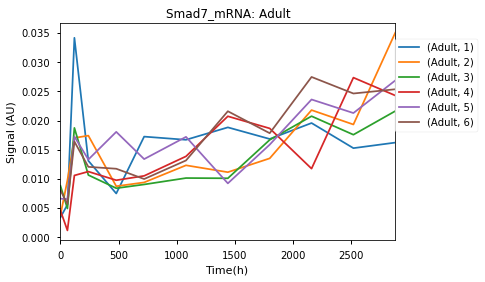

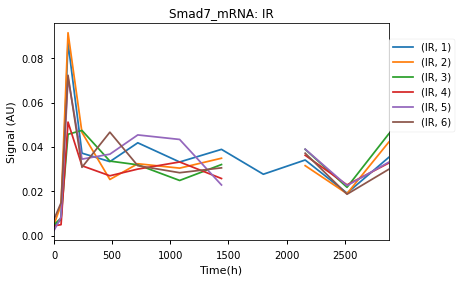

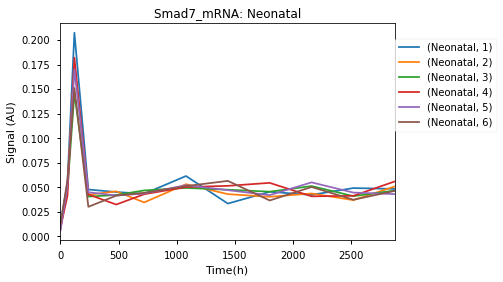

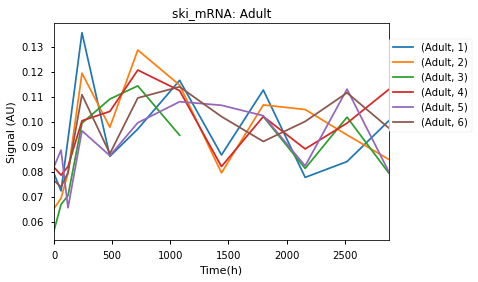

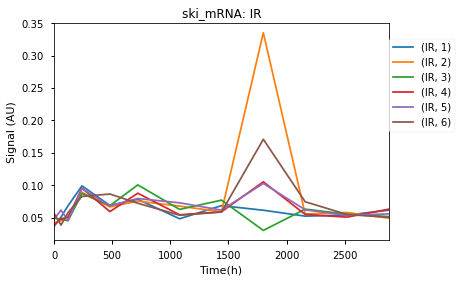

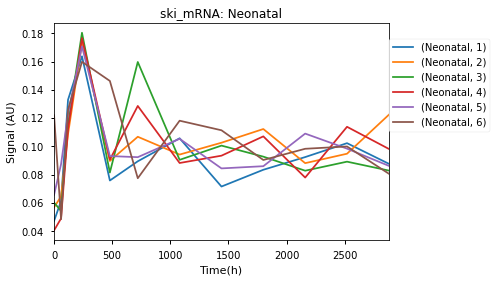

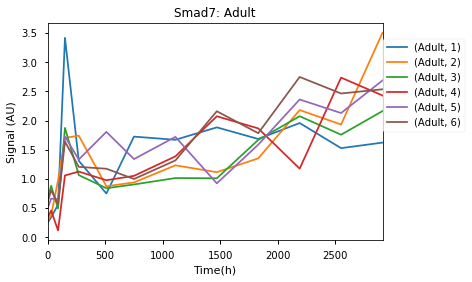

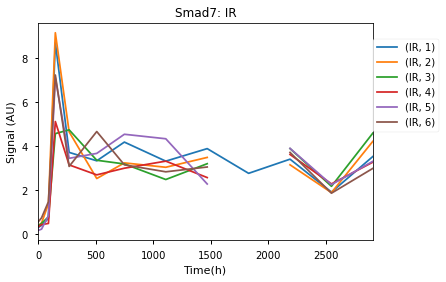

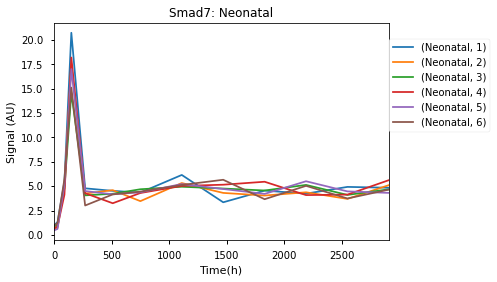

In [25]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context='notebook')

def plot_experimental(data, title):
    for label, df in data.groupby(level=0):
        plt.figure()
        ax = df.transpose().plot()
        ax.legend(loc=(1, 0.5))
        plt.title('{}: {}'.format(title, label))
        plt.ylabel('Signal (AU)')
        plt.xlabel('Time(h)')
        
plot_experimental(smad7_mRNA_data, 'Smad7_mRNA')
plot_experimental(ski_data, 'ski_mRNA')
plot_experimental(smad7_protein_data, 'Smad7')


## Create Copasi Style data files
-  Format data files for use in copasi.
-  Organize into folders
-  Make sure data has labels that correspond exactly to model quantities 
    -  (i.e. here its the global quantities: Smad7Obs, SkiObs and Smad7mRNAObs)
-  The interesting dynamic in this data seems to be over by 12h. Truncate the data at 12h
-  Ensure data is in the same time units as the model (minutes)

In [26]:
def format_copasi(data, data_directory, data_name, truncate_number):
    file_dct = {}
    ## iterate over cell types
    for label, df in data.groupby(level=0):
        ## nested dict for resutls collection
        
        file_dct[label] = {}
        ## reset index, transpose and rename index
        df = df.reset_index(drop='True')
        df = df.transpose()
        df.index.name = 'Time'
        
        ##iterate over each column
        for i in df.columns:
            ##create subdirectory for each cell type
            dir2 = os.path.join(data_directory, label)
            if not os.path.isdir(dir2):
                os.makedirs(dir2)
                
            ## get experimental repeat
            smad7 = pandas.DataFrame(df[i])
            smad7 = smad7.astype(float)
            smad7 = smad7.reset_index()
            
            ## relabel to match model variable
            smad7.columns=['Time', data_name]
            
            ## ensure consistent time units
            smad7['Time'] = (smad7['Time'].astype(float)*60)
            smad7 = smad7.iloc[:truncate_number]
            
            ## write to file
            fle = os.path.join(dir2, '{}_{}_data.csv'.format(i, data_name))
            file_dct[label][i] = fle
            smad7.to_csv(fle, index=False, sep='\t')
    return file_dct


# ## Directories for data
smad7_protein_data_directory = os.path.join(directory, 'Smad7ProteinDataDirectory')
ski_data_directory = os.path.join(directory, 'SkiDataDirectory')
smad7_mRNA_directory = os.path.join(directory, 'Smad7mRNADataDirectory')

## format and write the data files
smad7_protein_data_files = format_copasi(smad7_protein_data, smad7_protein_data_directory, 'Smad7Obs', truncate_number=6)
ski_data_files = format_copasi(ski_data, ski_data_directory, 'SkiObs', truncate_number=6)
smad7_mRNA_data_files = format_copasi(smad7_mRNA_data, smad7_mRNA_directory, 'Smad7mRNAObs', truncate_number=6)


## Move data into fit folder


In [27]:
import shutil

for i in [smad7_protein_data_files, ski_data_files, smad7_protein_data_files]:
    for  j in i['Neonatal']:
        print (i['Neonatal'][j])
        shutil.copy(i['Neonatal'][j], fit_dir)
    
print (fit_dir)

/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/0_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/1_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/2_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/3_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/4_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/Smad7ProteinDataDirectory/Neonatal/5_Smad7Obs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/SkiDataDirectory/Neonatal/0_SkiObs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/SkiDataDirectory/Neonatal/1_SkiObs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Examples/SkiDataDirectory/Neonatal/2_SkiObs_data.csv
/home/b3053674/Documents/pycotools/pycotools/Example

## Set Initial Conditions of New Components
Compute averages of the 6 repeats and set as initial concentrations 
### Compute averages of repeat experiments

In [28]:
import numpy
smad7_mRNA_starting_values = pandas.DataFrame(smad7_mRNA_data[0].groupby(level=0).agg(numpy.mean))
ski_starting_values = pandas.DataFrame(ski_data[0].groupby(level=0).agg(numpy.mean))
smad7_protein_starting_values = pandas.DataFrame(smad7_protein_data[0].groupby(level=0).agg(numpy.mean))

In [ ]:
smad7_protein_starting_values

## Set initial conditions of new species 

In [29]:
def set_initial_values(all_models, cell_type):
    new_models = []
    for mod in all_models.values():
        mod = mod.set('global_quantity', 'Smad7mRNAInitial', 
                      float(smad7_mRNA_starting_values.loc[cell_type]), match_field='name', change_field='initial_value')
        
        mod = mod.set('global_quantity', 'SkiInitial', 
                      float(ski_starting_values.loc[cell_type]), match_field='name', change_field='initial_value') 
                      
        mod = mod.set('global_quantity', 'Smad7ProteinInitial', 
                      float(smad7_protein_starting_values.loc[cell_type]), match_field='name', change_field='initial_value')
        
        new_models.append(mod)
    return new_models

models = set_initial_values(models, 'Neonatal')
models

[Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)]

## Save the model to file
Thus far our changes have been in held in memory. To write to file use the `save` method. 

In [30]:
[i.save() for i in models]

[Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)]

# Run Parameter Estimation

In [ ]:
# PE = tasks.ParameterEstimation(mode)

m1 = models[0]

# PE = tasks.ParameterEstimation(
#     m1, 
#     smad7_mRNA_data_files['Neonatal'].values() + smad7_protein_data_files['Neonatal'].values() + ski_data_files['Neonatal'].values(),
#     metabolites=['Ski'], global_quantities=['Smad7SF', 'SkiSF'], 
#     local_parameters=[i.global_name for i in m1.local_parameters], overwrite_config_file=True,
#     method='genetic_algorithm', population_size=100, number_of_generations=300,
#     upper_bound=1e4
# )

# PE = tasks.ParameterEstimation(
#     m1, 
#     smad7_mRNA_data_files['Neonatal'].values() + smad7_protein_data_files['Neonatal'].values() + ski_data_files['Neonatal'].values(),
#     metabolites=['Ski'], global_quantities=['Smad7SF', 'SkiSF'], 
#     local_parameters=[i.global_name for i in m1.local_parameters], overwrite_config_file=True,
#     method='hooke_jeeves', iteration_limit=200,
#     upper_bound=1e4
# )

# PE = tasks.ParameterEstimation(
#     m1, 
#     smad7_mRNA_data_files['Neonatal'].values() + smad7_protein_data_files['Neonatal'].values() + ski_data_files['Neonatal'].values(),
#     metabolites=['Ski'], global_quantities=['Smad7SF', 'SkiSF'], 
#     local_parameters=[i.global_name for i in m1.local_parameters], overwrite_config_file=True,
#     method='particle_swarm', swarm_size=100, iteration_limit=2000,
#     upper_bound=1e4
# )

PE.write_config_file()


In [ ]:
PE.setup()

In [ ]:
PE.model.open()

In [ ]:
import os


CLUSTER = False

if CLUSTER:
    directory = r'/sharedlustre/users/b3053674/2017/10_Oct/ModellingSmad7WithZi/Fit1Dir'
    if not os.path.isdir(directory):
        raise Exception('Your not running on the cluster')

else:
    directory = r'/home/b3053674/Documents/pycotools/pycotools/Examples/Fit1Dir'
    import site
    site.addsitedir('/home/b3053674/Documents/pycotools')
    if not os.path.isdir(directory):
        raise Exception('Your are running on the cluster')

from pycotools import *
from pycotools.Tests import test_models

PE = tasks.MultiModelFit(
    directory,
    metabolites=['Ski'], global_quantities=['Smad7SF', 'SkiSF'],
    overwrite_config_file=True,
    method='genetic_algorithm', population_size=5, number_of_generations=5,
    upper_bound=1e4,
    copy_number=1, pe_number=1, run_mode='sge'
)


# PE.write_config_file()
# PE.setup()
# PE.run()




In [ ]:
MS = viz.ModelSelection(PE, log10=True)

In [ ]:
MS.boxplot()

## Visualize Rss Vs Iterations

In [ ]:
for m in MS:
    viz.RssVsIterations(m, savefig=True)

In [ ]:
for m in MS:
    viz.Boxplot(m, savefig=True, log10=True)

In [ ]:
for m in MS:
    viz.EnsembleTimeCourse(m, savefig=True)